In [13]:
#this is to compare with the MATLAB code. 

In [14]:
#importing the required libraries

import networkx as nx

import numpy as np
import random

import matplotlib.pyplot as plt

In [15]:
#opening a file to store data
f = open("dub_check_mat_py.txt","w+") 

In [16]:
#user controlled variables

for p in range(0,11) :
    p = p*0.1
    for start in range(0,11) :
        start = start*0.1
        print('p=',p)  #initial condition : fraction of infected individuals

        print('start=',start)   #probability of dose transfer upon interaction
        rho = 1   #probability of becoming susceptible after recovery
        r = 0.5    #probability of recovery when dose level drops below threshold

        N = 100   #number of individuals
        T = 1000  #number of time steps

        mem_time_steps = 2 #the number of previous time steps which the individual remembers about 

        d_star = 1*np.ones((N,1),dtype=np.int32)
        # print('d_star')
        # print(d_star)
        # print(type(d_star))
        # print(d_star.shape)

        #initialising variables and arrays to store information

        kount = 0

        phi_star = 999*np.ones([11,2]) #fraction of steady state infected
        # print('phi_star')
        # print(phi_star)
        # print(phi_star.shape)

        phi = 999*np.ones([1,T]) #fraction of steady state infected
        # print('phi')
        # print(phi)
        # print(phi.shape)

        t = np.arange(0,T) #time steps
        t = np.asarray(t).reshape(1,T)
        # print('t')
        # print(t)
        # print(t.shape)
        # print(type(t))

        partner = 999*np.ones((N,T),dtype=np.int32) #partners used to form pairs in every time step
        partner = np.asarray(partner)
        # print('partner')
        # print(partner.shape)
        # print(type(partner))
        indi_state = np.zeros((N,T),dtype=np.int32) #stores the state of eahc individual
        indi_state[:,0] = 1
        # print('indi_state')
        # print(indi_state)
        # print(type(indi_state))

        d_ini = np.zeros((N,mem_time_steps))
        # print('d_ini')
        # print(type(d_ini))
        # print(d_ini.shape)
        # print(d_ini)
        d = 999*np.ones((N,T)) #doses
        # print('d')
        # print(d)
        # print(type(d))
        D = 999*np.ones((N,T)) #cumulative doses
        # print('D')
        # print(D)
        # print(type(D))

        z1 = 2*np.ones((N,T)) #stores the random numbers for deciding the dose transfer
        z2 = 2*np.ones((N,T)) #stores the random numbers for deciding resusceptibility upon recovery
        z3 = 2*np.ones((N,T)) #stores the random numbers for deciding immunity upon recovery
        # print('z1')
        # print(z1)
        # print(type(z1))

        #initial state of individuals
        #randomly grouping into i, s or r

        infec = random.sample(range(0, N), np.int32(start*N)) #radnomly infecting few individuals as initial condition
        # np.random.shuffle(infec)
        infec = np.asarray(infec).reshape(np.int32(start*N),1)
        if start != 0 :
            indi_state[infec[:,0],0] = 2
        # print('infec')
        # print(type(infec))
        # print(infec)
        # print('indi_state')
        # print(indi_state)

        phi[0,0] = np.count_nonzero(indi_state[:,0] == 2)/N
        # print('phi')
        # print(phi)

        #implementing marc's initial condition
        I = np.where(indi_state[:,0]==2)
        I = np.transpose(np.asarray(I))
        # print('I')
        # print(type(I))
        # print(I.shape)
        # print(I)

        if len(I) != 0 :
            for i in range(0,len(I)) : 
                d_ini[I[i],0:] = p
        else :
            d_ini[:,0:] = 0

        # print('d_ini')
        # print(d_ini)

        kount = 0
        # val = np.int32(N/2)
        for k in range(1,T): #loop for time
        #     print('k = ',k)

            for n in range(0,N): #loop for nodes
        #         print('n = ',n)
                partner[n,k] = np.random.randint(0,N)
        #         print(partner[n,k])
                z1[n,k] = np.random.uniform()

                #if one is infected and the other is susceptible and they are connected 
                if (indi_state[n,k-1] == 1) and (indi_state[partner[n,k],k-1] == 2) :
                    if p >= z1[n,k] :
        #                 print('postive dose to the one')
                        d[n,k] = 1 #the one receives constant dose
#                         d[partner[n,k],k] = 0 #the other receives no dose
                    else :
        #                 'interaction but no dose'
                        d[n,k] = 0
#                         d[partner[n,k],k] = 0
                #if both are infected and they are connected
                elif (indi_state[n,k-1] == 2) and (indi_state[partner[n,k],k-1] == 2) :
                    if p >= z1[n,k] :
        #                 'postive dose for both'
                        d[n,k] = 1 #the other receives constant dose
#                         d[partner[n,k],k] = 0 #the one STILL receives NO DOSE
                    else :
        #                 'interaction but no dose'
                        d[n,k] = 0
#                         d[partner[n,k],k] = 0
                else :
        #             'no interaction at all'
                        d[n,k] = 0
#                         d[partner[n,k],k] = 0


        #     updating cumulative dose
            D[:,k] = 0
            m = k - (mem_time_steps)
            if m > 0 :
                D[:,k] = np.sum(d[:,m:k+1:1],1)
            if m <= 0 :
                while m <= 0 :
                    m = m + 1
                D[:,k] = np.sum(d[:,m:k+1:1],1) + np.sum(d_ini[:,0:((mem_time_steps-(k-m))):1],1)

            for n in range(0,N):
        #         print(n)
        #         print(k)
        #         if threshold is met and is susceptible
                if (D[n,k] >= d_star[n,0]) and (indi_state[n,k-1] == 1) :
        #             'above thresh becomes infected'
                    indi_state[n,k] = 2 #susceptible becomes infected
                elif (D[n,k] < d_star[n,0]) and (indi_state[n,k-1] == 2) :
        #         recovery : if drops bel threshold and is infected
                    z2[n,k] = np.random.uniform()
                    if r >= z2[n,k] :
        #                 'below thresh'
                        z3[n,k] = np.random.uniform()
                        if rho >= z3[n,k] :
        #                     'below thresh becomes susceptible'
                            indi_state[n,k] = 1
                        else :
        #                     'below thresh becomes immune'
                            indi_state[n,k] = 3
                    else :
        #                 'below thresh stays infected'
                        indi_state[n,k] = 2
                else :
        #             'retains previous state'
                    indi_state[n,k] = indi_state[n,k-1]

            phi[0,k] = np.count_nonzero(indi_state[:,k] == 2)/N
        #     kount = kount + 1
        
        phi_star = sum(phi[0,k-100:k])/100 #obtaining average phi_star of the last 100 time steps
#         print(phi_star)

        f.write("%f\t%f\t%f\n" % (p,start,phi_star))
        f.flush()

p= 0.0
start= 0.0
p= 0.0
start= 0.1
p= 0.0
start= 0.2
p= 0.0
start= 0.30000000000000004
p= 0.0
start= 0.4
p= 0.0
start= 0.5
p= 0.0
start= 0.6000000000000001
p= 0.0
start= 0.7000000000000001
p= 0.0
start= 0.8
p= 0.0
start= 0.9
p= 0.0
start= 1.0
p= 0.1
start= 0.0
p= 0.1
start= 0.1
p= 0.1
start= 0.2
p= 0.1
start= 0.30000000000000004
p= 0.1
start= 0.4
p= 0.1
start= 0.5
p= 0.1
start= 0.6000000000000001
p= 0.1
start= 0.7000000000000001
p= 0.1
start= 0.8
p= 0.1
start= 0.9
p= 0.1
start= 1.0
p= 0.2
start= 0.0
p= 0.2
start= 0.1
p= 0.2
start= 0.2
p= 0.2
start= 0.30000000000000004
p= 0.2
start= 0.4
p= 0.2
start= 0.5
p= 0.2
start= 0.6000000000000001
p= 0.2
start= 0.7000000000000001
p= 0.2
start= 0.8
p= 0.2
start= 0.9
p= 0.2
start= 1.0
p= 0.30000000000000004
start= 0.0
p= 0.30000000000000004
start= 0.1
p= 0.30000000000000004
start= 0.2
p= 0.30000000000000004
start= 0.30000000000000004
p= 0.30000000000000004
start= 0.4
p= 0.30000000000000004
start= 0.5
p= 0.30000000000000004
start= 0.6000000000000001

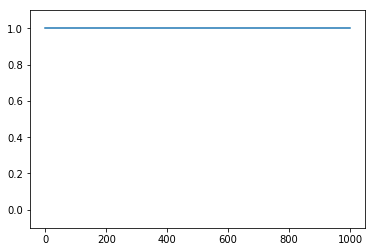

In [17]:
#printing out the necessary variables
# print(d)
# print(D)
# print(z1)
# print(phi)
plt.ylim([-0.1, 1.1])
plt.plot(t[0,:],phi[0,:])
plt.show()

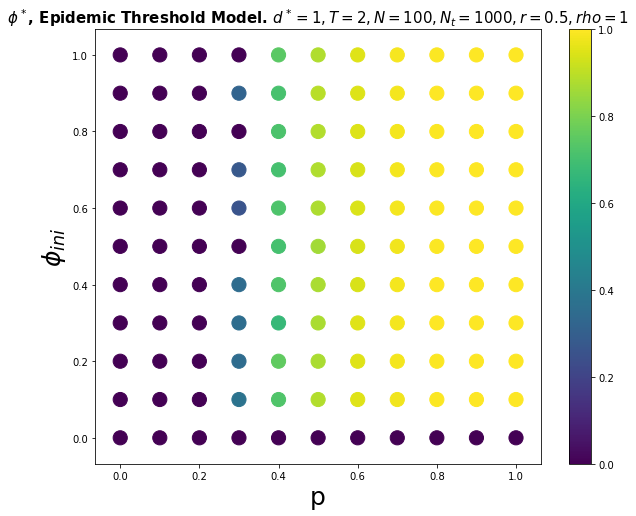

In [18]:
a = np.loadtxt("dub_check_mat_py.txt")[:,0]
b =  np.loadtxt("dub_check_mat_py.txt")[:,1]
c =  np.loadtxt("dub_check_mat_py.txt")[:,2]


plt.figure(figsize=(10,8))
plt.scatter(a, b, c=c,s=200)
plt.colorbar()
# plt.title(r'$\phi^*$, Critical Threshold Model. $d^*=3,T=12, N=100,N_t=1000,r=1,rho=1$',fontsize=15,fontweight='bold')
plt.title(r'$\phi^*$, Epidemic Threshold Model. $d^*=1,T=2, N=100,N_t=1000,r=0.5,rho=1$',fontsize=15,fontweight='bold')
plt.xlabel('p',fontsize=25)
plt.xlabel('p',fontsize=25)
plt.ylabel(r'$\phi_{ini}$',fontsize=25)
plt.savefig("test.svg", format="svg")
plt.show()
